# **Multimodal Conversational AI for E-commerce: A Vision-Language Approach**


## Understanding Multimodal Data

In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import random
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
from io import BytesIO
import numpy as np
from IPython.display import Markdown, display

c:\Users\zcali\OneDrive\Documents\Gen AI\gaivenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Data

In [2]:
#download kaggle dataset
path = kagglehub.dataset_download("promptcloud/amazon-product-dataset-2020")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\zcali\.cache\kagglehub\datasets\promptcloud\amazon-product-dataset-2020\versions\1


In [3]:
#list all the files
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

C:\Users\zcali\.cache\kagglehub\datasets\promptcloud\amazon-product-dataset-2020\versions\1\home\sdf\marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv


In [4]:
#load data
csv_path = r"C:\Users\zcali\.cache\kagglehub\datasets\promptcloud\amazon-product-dataset-2020\versions\1\home\sdf\marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv"

df = pd.read_csv(
    csv_path,
    encoding='utf-8',
    on_bad_lines='skip',
    engine='python',
    quotechar='"',
    escapechar='\\'
)

### Exploratory Data Analysis

In [5]:
#observe columns
print(df.columns)

Index(['Uniq Id', 'Product Name', 'Brand Name', 'Asin', 'Category',
       'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity',
       'Model Number', 'About Product', 'Product Specification',
       'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image',
       'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details',
       'Dimensions', 'Color', 'Ingredients', 'Direction To Use',
       'Is Amazon Seller', 'Size Quantity Variant', 'Product Description'],
      dtype='object')


In [6]:
#check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                10001 non-null  object 
 1   Product Name           10001 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9171 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9894 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8229 non-null   object 
 10  About Product          9728 non-null   object 
 11  Product Specification  8369 non-null   object 
 12  Technical Details      9211 non-null   object 
 13  Shipping Weight        8863 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

In [7]:
df.head()

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [8]:
#how many missing values?
df.isna().sum()

Uniq Id                      0
Product Name                 0
Brand Name               10001
Asin                     10001
Category                   830
Upc Ean Code              9967
List Price               10001
Selling Price              107
Quantity                 10001
Model Number              1772
About Product              273
Product Specification     1632
Technical Details          790
Shipping Weight           1138
Product Dimensions        9522
Image                        0
Variants                  7523
Sku                      10001
Product Url                  0
Stock                    10001
Product Details          10001
Dimensions               10001
Color                    10001
Ingredients              10001
Direction To Use         10001
Is Amazon Seller             0
Size Quantity Variant    10001
Product Description      10001
dtype: int64

In [9]:
unique_counts = df.nunique(dropna=False).sort_values(ascending=False)
print(unique_counts)

Uniq Id                  10001
Product Url              10001
Image                     9933
Product Name              9929
About Product             9036
Technical Details         8657
Product Specification     8367
Model Number              8109
Selling Price             3876
Variants                  2446
Category                   939
Shipping Weight            838
Product Dimensions         459
Upc Ean Code                35
Is Amazon Seller             2
Asin                         1
Quantity                     1
List Price                   1
Brand Name                   1
Sku                          1
Stock                        1
Product Details              1
Color                        1
Dimensions                   1
Ingredients                  1
Direction To Use             1
Size Quantity Variant        1
Product Description          1
dtype: int64


In [10]:
#check how many of the one value columns only have NaN values
one_value_cols = df.columns[df.nunique(dropna=False) == 1]

print("Columns with only one unique value:\n")

for col in one_value_cols:
    unique_val = df[col].dropna().unique()
    val_display = unique_val[0] if len(unique_val) > 0 else "NaN"
    print(f"- {col}: {val_display}")

Columns with only one unique value:

- Brand Name: NaN
- Asin: NaN
- List Price: NaN
- Quantity: NaN
- Sku: NaN
- Stock: NaN
- Product Details: NaN
- Dimensions: NaN
- Color: NaN
- Ingredients: NaN
- Direction To Use: NaN
- Size Quantity Variant: NaN
- Product Description: NaN


In [11]:
#check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [12]:
#save og row count just in case
original_row_count = len(df)
print(original_row_count)

10001


In [13]:
#check general size and quality of images
def get_image_metadata(url):
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=5)
        img = Image.open(BytesIO(response.content))
        size_bytes = len(response.content)
        resolution = img.size  
        return resolution, size_bytes
    except:
        return None, None

#use random sample of 100 images for speed
sample_urls = random.sample(df['Image'].dropna().tolist(), 100)

image_metadata = [get_image_metadata(url) for url in tqdm(sample_urls)]
image_metadata = [meta for meta in image_metadata if None not in meta]

#get resolution and size
if image_metadata:
    resolutions, sizes_bytes = zip(*image_metadata)
    widths, heights = zip(*resolutions)
    sizes_kb = [round(b / 1024, 2) for b in sizes_bytes]

    #calc stats for res
    avg_width = int(np.mean(widths))
    avg_height = int(np.mean(heights))
    min_width, min_height = min(widths), min(heights)
    max_width, max_height = max(widths), max(heights)
    image_resolution_summary = f"Avg: {avg_width}×{avg_height}px | Min: {min_width}×{min_height}px | Max: {max_width}×{max_height}px"

    #calc states for size
    avg_size = round(np.mean(sizes_kb), 2)
    min_size = round(min(sizes_kb), 2)
    max_size = round(max(sizes_kb), 2)
    image_file_size_summary = f"Avg: {avg_size}KB | Min: {min_size}KB | Max: {max_size}KB"
else:
    image_resolution_summary = "Unable to determine"
    image_file_size_summary = "Unable to determine"

#print
print("Image Resolution Summary:", image_resolution_summary)
print("Image File Size Summary:", image_file_size_summary)

100%|██████████| 100/100 [00:25<00:00,  3.99it/s]

Image Resolution Summary: Avg: 445×461px | Min: 156×165px | Max: 500×500px
Image File Size Summary: Avg: 33.6KB | Min: 7.91KB | Max: 79.92KB


### Preprocess Data

In [14]:
#clean column names
df = df.rename(columns=lambda x: x.strip())

#only keep first image - CLIP only supports one image per product
df['Image'] = df['Image'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else x)

#drop rows missing important fields
df = df.dropna(subset=['Image', 'Product Name'])

#fill missing text fields with None
text_cols = [
    'Product Name', 'Brand Name', 'About Product', 'Product Description',
    'Product Specification', 'Technical Details', 'Category',
    'List Price', 'Selling Price'
]
df[text_cols] = df[text_cols].fillna('None')

#reformat category and split into levels
df[['Category_L1', 'Category_L2', 'Category_L3']] = df['Category'].str.split('|', expand=True).iloc[:, :3]

#convert prices to numbers, take average if range is given
def extract_avg_price(price_str):
    if pd.isna(price_str) or price_str.strip() == '':
        return np.nan
    price_str = price_str.replace('$', '').strip()
    
    if '-' in price_str:
        parts = price_str.split('-')
        try:
            prices = [float(p.strip()) for p in parts if p.strip()]
            return sum(prices) / len(prices) if prices else np.nan
        except:
            return np.nan
    try:
        return float(price_str)
    except:
        return np.nan

df['Selling Price Numeric'] = df['Selling Price'].apply(extract_avg_price)

#convert all weights to pounds
def convert_weight(value):
    if pd.isna(value) or value == '':
        return np.nan
    value = value.lower()
    try:
        if 'pound' in value:
            return float(value.split()[0])
        elif 'ounce' in value:
            return float(value.split()[0]) / 16
    except:
        return np.nan

df['Shipping Weight Numeric'] = df['Shipping Weight'].apply(convert_weight)

#combine all key fields to one description
def combine_text(row):
    parts = [
        f"Title: {row['Product Name']}",
        f"Brand: {row['Brand Name']}",
        f"Price: {row['Selling Price'] or row['List Price']}",
        f"Category: {row['Category']}",
        f"About: {row['About Product']}",
        f"Description: {row['Product Description']}",
        f"Specs: {row['Product Specification']}",
        f"Technical: {row['Technical Details']}"
    ]
    return "\n".join([p for p in parts if p.strip()])

#save as df
df['full_description'] = df.apply(combine_text, axis=1)

In [15]:
#save cleaned csv
df[['Image', 'full_description']].to_csv("cleaned_product_data.csv", index=False)

Title: DB Longboards CoreFlex Crossbow 41" Bamboo Fiberglass Longboard Complete
Brand: None
Price: $237.68
Category: Sports & Outdoors | Outdoor Recreation | Skates, Skateboards & Scooters | Skateboarding | Standard Skateboards & Longboards | Longboards
About: Make sure this fits by entering your model number. | RESPONSIVE FLEX: The Crossbow features a bamboo core encased in triaxial fiberglass and HD plastic for a responsive flex pattern that’s second to none. Pumping & carving have never been so satisfying! Flex 2 is recommended for people 120 to 170 pounds. | COREFLEX TECH: CoreFlex construction is water resistant, impact resistant, scratch resistant and has a flex like you won’t believe. These boards combine fiberglass, epoxy, HD plastic and bamboo to create a perfect blend of performance and strength. | INSPIRED BY THE NORTHWEST: Our founding ideal is chasing adventure & riding the best boards possible, inspired by the hills, waves, beaches & mountains all around our headquarters 

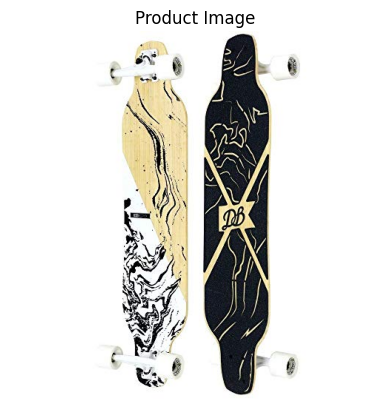

In [16]:
#check if text and image load correctly
def preview_sample(idx):
    row = df.iloc[idx]
    print(row['full_description'])
    
    try:
        response = requests.get(row['Image'], headers={"User-Agent": "Mozilla/5.0"})
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.axis('off')
        plt.title("Product Image")
        plt.show()
    except:
        print("Could not load image.")

preview_sample(0)

In [17]:
print(df.columns.tolist())

['Uniq Id', 'Product Name', 'Brand Name', 'Asin', 'Category', 'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity', 'Model Number', 'About Product', 'Product Specification', 'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image', 'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details', 'Dimensions', 'Color', 'Ingredients', 'Direction To Use', 'Is Amazon Seller', 'Size Quantity Variant', 'Product Description', 'Category_L1', 'Category_L2', 'Category_L3', 'Selling Price Numeric', 'Shipping Weight Numeric', 'full_description']


In [18]:
n = len(df)
print(f"Usable products after cleaning: {n}")

df['description_word_count'] = df['full_description'].apply(lambda x: len(str(x).split()))
avg_word_count = df['description_word_count'].mean()
print(f"Average word count in full_description: {avg_word_count:.2f}")

df['description_word_count'].describe()

top_categories_l1 = df['Category_L1'].value_counts().head(5)
print("\nTop categories:\n", top_categories_l1)

top_categories_l2 = df['Category_L2'].value_counts().head(5)
print("\nTop categories:\n", top_categories_l2)

Usable products after cleaning: 10001
Average word count in full_description: 215.37

Top categories:
 Category_L1
Toys & Games                  6662
None                           830
Home & Kitchen                 707
Clothing, Shoes & Jewelry      630
Sports & Outdoors              540
Name: count, dtype: int64

Top categories:
 Category_L2
Hobbies                     889
Games & Accessories         535
Costumes & Accessories      532
Dress Up & Pretend Play     442
Sports & Outdoor Play       411
Name: count, dtype: int64


In [19]:
#test success rate of downloading images from data - want to make sure images are accessible before handing off to CLIP
def test_image_download(url):
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=5)
        return response.status_code == 200
    except:
        return False

sample_urls = random.sample(df['Image'].dropna().tolist(), 100)
success = sum(test_image_download(url) for url in tqdm(sample_urls))

image_success_rate = success

print(f"Success rate: {success}/100 ({success}%)")

100%|██████████| 100/100 [00:14<00:00,  7.13it/s]

Success rate: 100/100 (100%)


In [20]:
#check how similar descriptions are
sample = df['full_description'].sample(200).tolist()
tfidf = TfidfVectorizer().fit_transform(sample)
cos_sim = cosine_similarity(tfidf)

max_sim = np.max(cos_sim - np.eye(len(sample)))

max_description_sim = max_sim

print(f"Max similarity (off-diagonal): {max_sim:.2f}")

Max similarity (off-diagonal): 0.76


In [21]:
#selling price stats
avg_price = df['Selling Price Numeric'].mean()
min_price = df['Selling Price Numeric'].min()
max_price = df['Selling Price Numeric'].max()

#shipping weight stats
avg_weight = df['Shipping Weight Numeric'].mean()
min_weight = df['Shipping Weight Numeric'].min()
max_weight = df['Shipping Weight Numeric'].max()

#calculate nan only columns
nan_only_cols_md = "\n".join(f"- {col}" for col in one_value_cols)

#calc similarity
max_sim_display = f"{max_description_sim:.2f}/1 ({max_description_sim * 100:.0f}%)"


In [22]:
summary = f"""
### EDA Summary 
- **Data:** Amazon Product Dataset 2020
- **Row count before cleaning:** {original_row_count}
- **Row count after cleaning:** {n}
- **Columns that contain only NaN values:**
```
{nan_only_cols_md if nan_only_cols_md else "None"}
```

- **Average word count in `full_description`:** {avg_word_count:.2f}

- **Highest similarity score between product descriptions:** {max_sim_display}

- **Selling Price (USD):**
    - Average: ${avg_price:.2f}  
    - Min: ${min_price:.2f}  
    - Max: ${max_price:.2f}

- **Shipping Weight (lbs):**
    - Average: {avg_weight:.2f} lbs  
    - Min: {min_weight:.2f} lbs  
    - Max: {max_weight:.2f} lbs

- **Top 5 Level One Categories:**
```
{top_categories_l1.to_string(index=True, header=False)}
```

- **Top 5 Level Two Categories:**
```
{top_categories_l2.to_string(index=True, header=False)}
```

- **Image download success rate:** {image_success_rate}/100 ({image_success_rate}%)
- **Image Resolution:**
    - Average: {avg_width}×{avg_height} px  
    - Min: {min_width}×{min_height} px  
    - Max: {max_width}×{max_height} px

- **Image File Size:**
    - Average: {avg_size:.2f} KB  
    - Min: {min_size:.2f} KB  
    - Max: {max_size:.2f} KB
"""

In [23]:
preprocessing_summary = """
### Data Preprocessing Summary

The following steps were applied to clean and prepare the dataset:

1. **Standardized column names** by stripping leading/trailing whitespace.
2. **Extracted first image URL** from pipe-separated `Image` field.
3. **Dropped rows missing essential values** (`Image` or `Product Name`).
4. **Filled missing values** in key text fields (e.g., `Brand Name`, `Category`, `Product Description`) with strings of "None" to ensure consistency.
5. **Created a unified `full_description`** field combining title, brand, pricing, and all product text fields.
6. **Converted `Selling Price`** to numeric format, averaging ranges when present and removing dollar signs.
7. **Parsed `Shipping Weight`** and converted all values to pounds (lbs), handling entries in ounces or malformed strings.
8. **Identified and listed columns** with only NaNs, but did not drop as may be significant later.  
9. **Split `Category`** into hierarchical levels for better analysis. 
"""

In [24]:
display(Markdown(summary))
display(Markdown(preprocessing_summary))


### EDA Summary 
- **Data:** Amazon Product Dataset 2020
- **Row count before cleaning:** 10001
- **Row count after cleaning:** 10001
- **Columns that contain only NaN values:**
```
- Brand Name
- Asin
- List Price
- Quantity
- Sku
- Stock
- Product Details
- Dimensions
- Color
- Ingredients
- Direction To Use
- Size Quantity Variant
- Product Description
```

- **Average word count in `full_description`:** 215.37

- **Highest similarity score between product descriptions:** 0.76/1 (76%)

- **Selling Price (USD):**
    - Average: $34.56  
    - Min: $0.01  
    - Max: $945.99

- **Shipping Weight (lbs):**
    - Average: 4.46 lbs  
    - Min: 0.01 lbs  
    - Max: 975.00 lbs

- **Top 5 Level One Categories:**
```
Toys & Games                  6662
None                           830
Home & Kitchen                 707
Clothing, Shoes & Jewelry      630
Sports & Outdoors              540
```

- **Top 5 Level Two Categories:**
```
Hobbies                     889
Games & Accessories         535
Costumes & Accessories      532
Dress Up & Pretend Play     442
Sports & Outdoor Play       411
```

- **Image download success rate:** 100/100 (100%)
- **Image Resolution:**
    - Average: 445×461 px  
    - Min: 156×165 px  
    - Max: 500×500 px

- **Image File Size:**
    - Average: 33.60 KB  
    - Min: 7.91 KB  
    - Max: 79.92 KB



### Data Preprocessing Summary

The following steps were applied to clean and prepare the dataset:

1. **Standardized column names** by stripping leading/trailing whitespace.
2. **Extracted first image URL** from pipe-separated `Image` field.
3. **Dropped rows missing essential values** (`Image` or `Product Name`).
4. **Filled missing values** in key text fields (e.g., `Brand Name`, `Category`, `Product Description`) with strings of "None" to ensure consistency.
5. **Created a unified `full_description`** field combining title, brand, pricing, and all product text fields.
6. **Converted `Selling Price`** to numeric format, averaging ranges when present and removing dollar signs.
7. **Parsed `Shipping Weight`** and converted all values to pounds (lbs), handling entries in ounces or malformed strings.
8. **Identified and listed columns** with only NaNs, but did not drop as may be significant later.  
9. **Split `Category`** into hierarchical levels for better analysis. 


## Implementing Vision-Language Retrieval-Augmented Generation (RAG)